# SIOC 221A: HW4

## Author: Victoria Boatwright
### I acknowledge that I got some advice and thoughts from Turner Johnson, Grant Meiners, and Sophie Wynn. 

In [54]:
import numpy as np 
import matplotlib.pyplot as plt
import netCDF4
import datetime as dt 
import matplotlib.dates as mdates
import pandas as pd 
import xarray as xr 
import scipy
import cmocean

plt.rcParams.update({'font.size': 16})

seconds since 1970-01-01 00:00:00 UTC


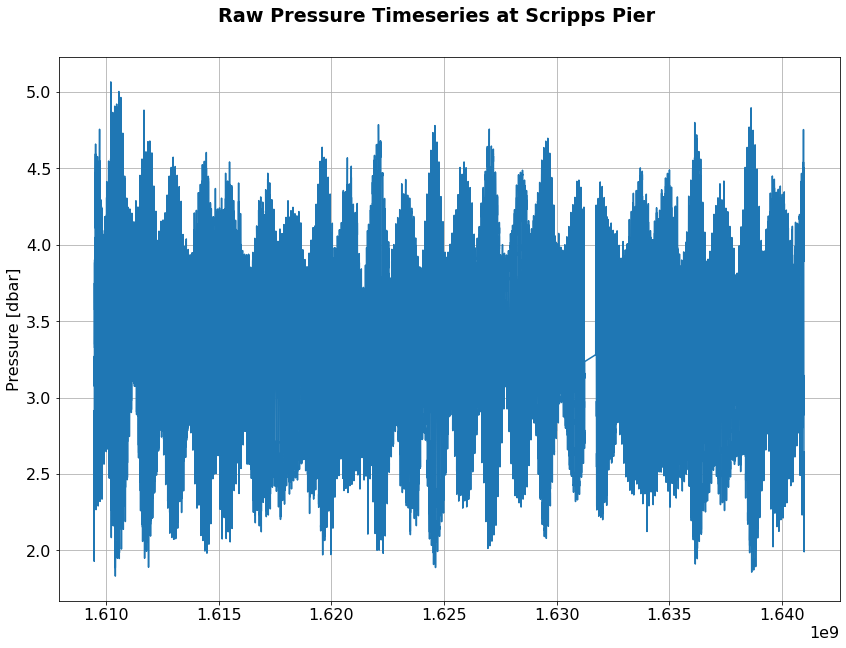

In [55]:
# downloading scripps pier data 

year_string = str(2021)
url_base = 'http://thredds.sccoos.org/thredds/dodsC/autoss/scripps_pier-'
url = url_base+year_string+'.nc'

# read current file: 
nc = netCDF4.Dataset(url)

time = nc['time'][:]
temp = nc['temperature'][:]
pressure = nc['pressure'][:]

# print(nc)
print(nc['time'].units)

fig,ax = plt.subplots(1,1,figsize=(14,10))
fig.suptitle('Raw Pressure Timeseries at Scripps Pier',y=0.95,fontweight='bold')
ax.grid()
ax.plot(time,pressure)
ax.set_ylabel('Pressure [dbar]')
plt.show()

# show the gaps in the data

(array([], dtype=int64),)
[]


NameError: name 'T' is not defined

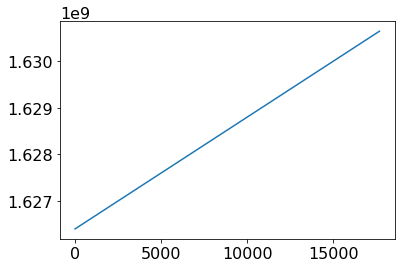

In [57]:
filled_time
time[t1]

from scipy import signal 

localmax = scipy.signal.argrelextrema(filled_time,np.greater)

print(localmax) 
print(filled_time[localmax])

xx = np.arange(0,len(filled_time))
plt.plot(xx,filled_time)
plt.scatter(xx[localmax],filled_time[localmax])
time[t1]



In [56]:
# downloading scripps pier data 

year_string = str(2021)
url_base = 'http://thredds.sccoos.org/thredds/dodsC/autoss/scripps_pier-'
url = url_base+year_string+'.nc'

# read current file: 
nc = netCDF4.Dataset(url)

time = nc['time'][:]
temp = nc['temperature'][:]
pressure = nc['pressure'][:]

# given a time domain of interest

t0 = 70521
t1 = 88190

# and also gave us values where we have gaps 

given_idx = [2420, 4952, 7496, 15042] 


# fill missing 

# knowing that each dt should be 4 min
timestep = 4*60 # 4 min in seconds (because data stored in seconds since 1970-01-01)
N = int((time[t1]-time[t0])/timestep)
filled_time = np.zeros((N)); filled_time[:] = np.nan

for nn in np.arange(0,N):
    filled_time[nn] = time[t0]+nn*timestep

filled_pressure = np.zeros((len(filled_time))); filled_pressure[:] = np.nan
subpressure = pressure[t0:t1]

idx1 = given_idx[0] 
# idx-1 will be up to existing data (in python)
filled_pressure[0:idx1-1] = subpressure[0:idx1-1]
# idx = the point to be filled 
filled_pressure[idx1] = np.nanmean(subpressure[idx1-3:idx1+1]) # fill with +/- 2 data points around missing point

# idx1+1 --> next idx + 1 (because newly added point! )
idx2 = given_idx[1]
filled_pressure[idx1+1:idx2+1] = subpressure[idx1:idx2]
# idx = the point to be filled --> new array = idx2 + 2 
filled_pressure[idx2+2] = np.nanmean(subpressure[idx2-3:idx2+1]) # fill with +/- 2 data points around missing point

# new array: idx2 + 2 --> next idx3 + 2
# old array: idx2 --> idx3 -1
idx3 = given_idx[2]
filled_pressure[idx2+3:idx3+3] = subpressure[idx2:idx3]
# idx = the point to be filled 
filled_pressure[idx3+4] = np.nanmean(subpressure[idx3-3:idx3+1]) # fill with +/- 2 data points around missing point

# new array: idx2 + 2 --> next idx3 + 2
# old array: idx2 --> idx3 -1
idx4 = given_idx[3]
filled_pressure[idx3+5:idx4+5] = subpressure[idx3:idx4]
# idx = the point to be filled 
filled_pressure[idx4+6] = np.nanmean(subpressure[idx4-3:idx4+1]) # fill with +/- 2 data points around missing point

filled_pressure[idx4+7:] = subpressure[idx4:]


# check sizes 

print(f'new pressure length: {len(filled_pressure)}')
print(f'compared to initial pressure length: {len(pressure)}')

sub_time = filled_time
sub_p = filled_pressure


print(f'subset pressure length: {len(sub_p)}')
print(f'subset time length: {len(sub_time)}')



new pressure length: 17676
compared to initial pressure length: 129244
subset pressure length: 17676
subset time length: 17676


In [50]:
year_string = str(2021)
url_base = 'http://thredds.sccoos.org/thredds/dodsC/autoss/scripps_pier-'
url = url_base+year_string+'.nc'

# read current file:
nc = netCDF4.Dataset(url)

time = nc['time'][:]
temp = nc['temperature'][:]
pressure = nc['pressure'][:]

# Matthew gave us a time domain of interest

t0 = 70521
t1 = 88190

# and also gave us values to deem as unworthy
# (I could actually search and find myself the missing data ... but I won't do that atm)

# filter missing

given_idx = [2420, 4952, 7496, 15042]

for ii in given_idx:
    # make a running mean based on nearest +/- 2 values
    near_mean = np.nanmean(pressure[2-ii:ii+2])
    pressure[ii] = near_mean
   

sub_time = time[t0:t1]
sub_temp = temp[t0:t1]
sub_p = pressure[t0:t1]
   


In [58]:
# convert to datetimes based on units of 'seconds since 1970-01-01'
s0 = dt.datetime(1970,1,1)
sub_dates = [s0+dt.timedelta(seconds=float(tt)) for tt in sub_time]
# sub_time = sub_time/3600/24 


[18824.08215278 18824.08493056 18824.08770833 ... 18873.17381944
 18873.17659722 18873.179375  ]
[0.00277778 0.00277778 0.00277778 ... 0.00277778 0.00277778 0.00277778]
[8641    0    0    0    0    0    0    0    0 9034]
[0.00277778 0.00277778 0.00277778 0.00277778 0.00277778 0.00277778
 0.00277778 0.00277778 0.00277778 0.00277778 0.00277778]


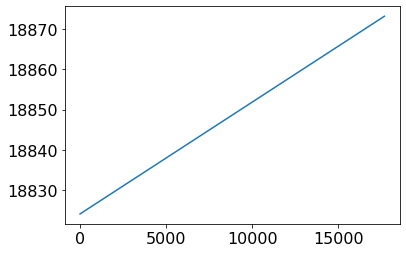

In [67]:
# convert subset time units to days 
sub_time = filled_time/3600/24 
print(sub_time)
plt.plot(sub_time)

sub_dt = np.diff(sub_time) # time in days
print(sub_dt)

[dist, binnums] = np.histogram(sub_dt)

print(dist)
print(binnums)

## Visual Evaluation 

Plot the time series of pressure data from 2021, and examine
the time increments between adjacent measurements. (You can do this in Matlab
using the “diff” command or in python using “numpy.diff”, for example.) Are the
data always uniformly spaced? What is the increment between measurements?
How long is the time record? Are there other portions of the 2021 record that also
have reliable uniform spacing?
2. Least-squares fit. Least-squares fit a mean and 3 major tidal constituents to your
data. Plot the raw and model solution.
What is the mean, and what are the total amplitudes of the tidal constituents?
(Total amplitude should be determined from the square root of the sum of the
squares of the sine and cosine amplitudes.)

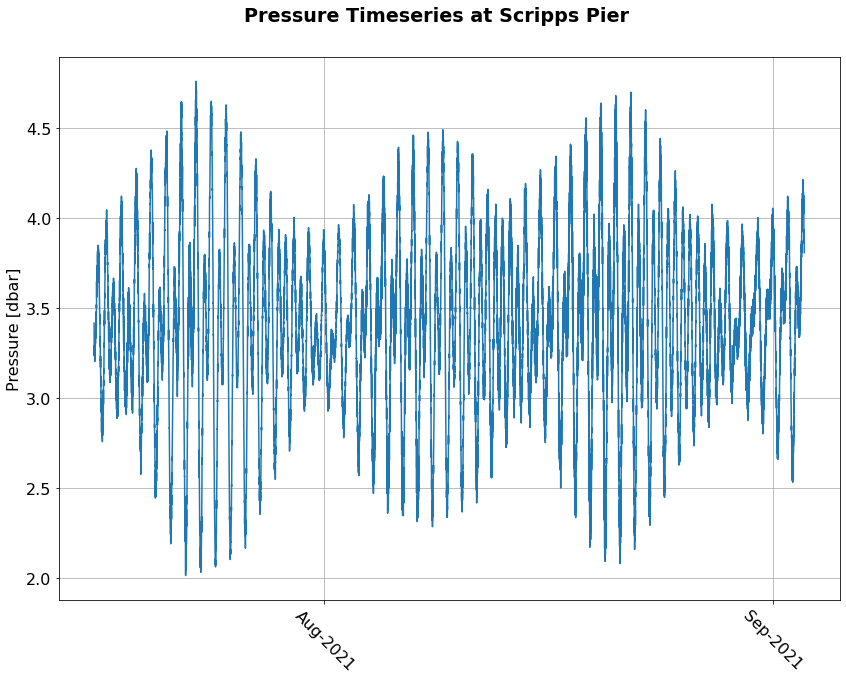

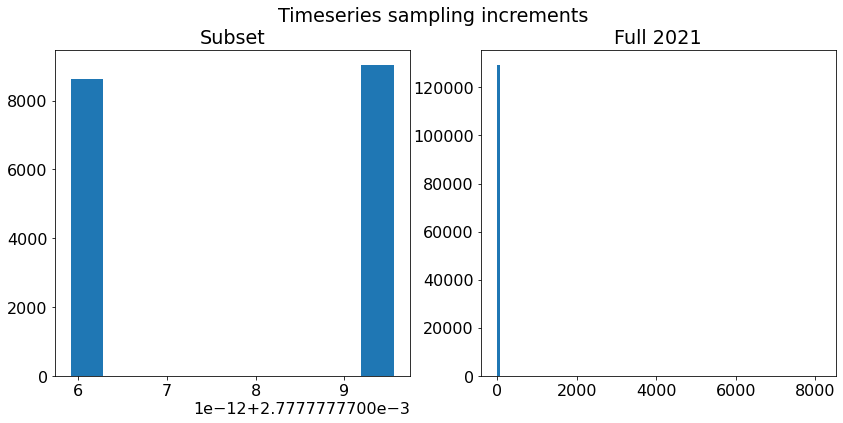

Appears to be sampling (in the small Aug-Sep window) every  0.002778 days! (aka  4.000 minutes)
Length of time record =  49.10 days
Compare with full 2021 record: 
Appears to be sampling (across all 2021) every  4.1 minutes!
Length of time record =  365.00 days


In [60]:
fig,ax = plt.subplots(1,1,figsize=(14,10))
fig.suptitle('Pressure Timeseries at Scripps Pier',y=0.95,fontweight='bold')
ax.grid()
ax.plot(sub_dates,sub_p)
ax.set_ylabel('Pressure [dbar]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.tick_params(axis='x', labelrotation = -45)
plt.show()

# space between measurements: 

deltat = np.diff(time)/60 # time in s --> convert to min
sub_dt = np.diff(sub_time) # time in days

fig,axes = plt.subplots(1,2,figsize=(14,6))
fig.suptitle('Timeseries sampling increments')
axes[0].hist(sub_dt)
axes[0].set_title('Subset')
axes[1].hist(deltat,100)
axes[1].set_title('Full 2021')
plt.show()

print(f'Appears to be sampling (in the small Aug-Sep window) every {np.nanmean(sub_dt): 4.6f} days! (aka {np.nanmean(sub_dt)*60*24: 4.3f} minutes)')
print(f'Length of time record = {(sub_time[-1]-sub_time[0]): 5.2f} days') 

print('Compare with full 2021 record: ')
print(f'Appears to be sampling (across all 2021) every {np.nanmean(deltat): 4.1f} minutes!')
print(f'Length of time record = {(time[-1]-time[0])/3600/24: 5.2f} days') 

## Least-squares fit. 
Least-squares fit a mean and 3 major tidal constituents to your data. Plot the raw and model solution. What is the mean, and what are the total amplitudes of the tidal constituents? (Total amplitude should be determined from the square root of the sum of the squares of the sine and cosine amplitudes.)

In [95]:
from numpy import linalg 
AAT = AA.T
AA
np.dot(AAT,data)
#np.linalg.inv(np.dot(AAT,AA))
#np.dot(np.linalg.inv(np.dot(AA.T, AA)), np.dot(AA.T, data))

finding = np.nonzero(time_array==np.nan)
finding

(array([], dtype=int64),)

Pressure mean fit: nan dbar


Total amplitudes of tidal constituents: 
O1 Component Amplitude: nan
K1 Component Amplitude: nan
M2 Component Amplitude: nan
All Constituents Amplitude: nan


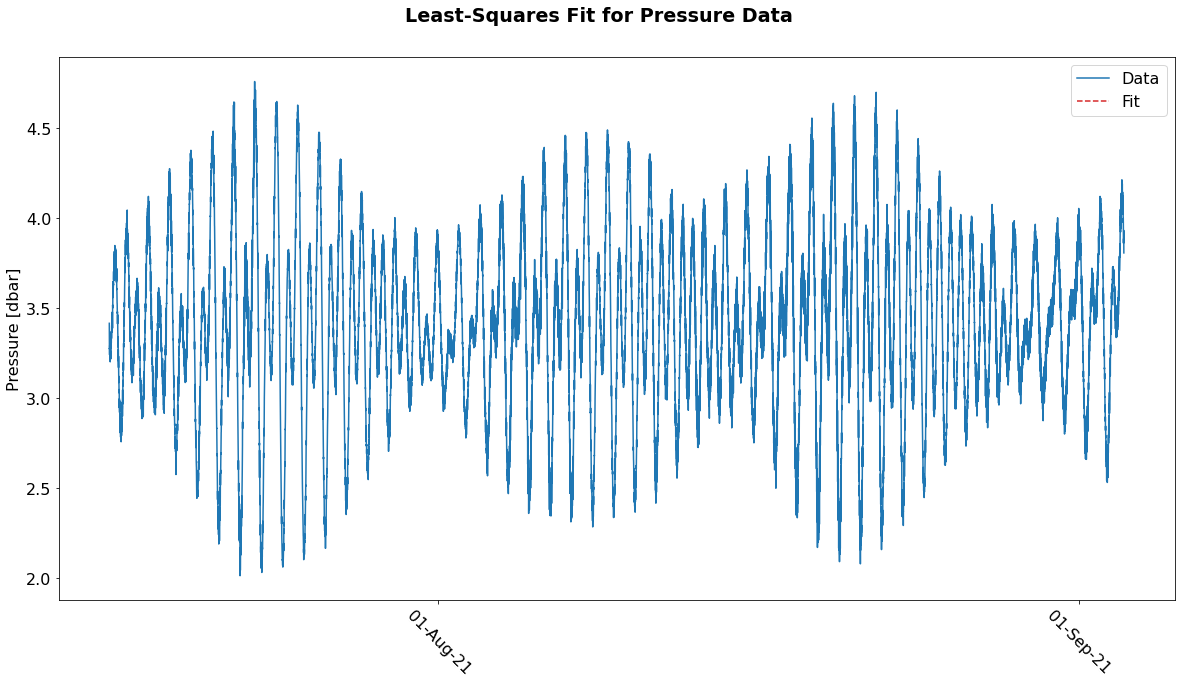

In [83]:
# using given frequency data 

# calculate least squares fit with mean & 3 major constituents 
data = sub_p 
time_array = sub_time 


# periods in days: 
O1 = 25.82/24 # principal lunar diurnal 
K1 = 23.93/24 # luni-solar diurnal period 
M2 = 12.42/24 # principal lunar period 

'''
AA = np.array([np.ones(len(sub_time)), 
               sub_time, 
               np.sin(2*np.pi*time_array/O1), np.cos(2*np.pi*time_array/O1), 
               np.sin(2*np.pi*time_array/K1), np.cos(2*np.pi*time_array/K1),
               np.sin(2*np.pi*time_array/M2), np.cos(2*np.pi*time_array/M2) ]).T
'''


AA = np.array([np.ones(len(sub_time)), 
               sub_time,
               np.sin(2*np.pi*time_array/O1), np.cos(2*np.pi*time_array/O1), 
               np.sin(2*np.pi*time_array/K1), np.cos(2*np.pi*time_array/K1),
               np.sin(2*np.pi*time_array/M2), np.cos(2*np.pi*time_array/M2) ]).T


x = np.dot(np.linalg.inv(np.dot(AA.T, AA)), np.dot(AA.T, data))
fit = np.dot(AA, x)
o1_amp = np.sqrt(x[1]**2 + x[2]**2 )
k1_amp = np.sqrt(x[3]**2 + x[4]**2 )
m2_amp = np.sqrt(x[5]**2 + x[6]**2 )
total_amplitude = np.sqrt(x[1]**2 + x[2]**2 + x[3]**2 + x[4]**2 + x[5]**2 + x[6]**2)

ls_mean = x[0]; 
print(f'Pressure mean fit: {ls_mean} dbar')
print('\n')
print(f'Total amplitudes of tidal constituents: \nO1 Component Amplitude: {o1_amp}\nK1 Component Amplitude: {k1_amp}\nM2 Component Amplitude: {m2_amp}\nAll Constituents Amplitude: {total_amplitude}')
   
fig,ax = plt.subplots(1,1,figsize=(20,10))
fig.suptitle('Least-Squares Fit for Pressure Data',fontweight='bold',y=0.95)
ax.plot(sub_dates,data,color='tab:blue',label='Data')
ax.plot(sub_dates,fit,color='tab:red',linestyle='--',label='Fit')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.tick_params(axis='x', labelrotation = -45)
ax.set_ylabel('Pressure [dbar]')
ax.legend(loc='upper right')
plt.show()



In [49]:
len(sub_p)

17669

## Fourier Transform

### a) Plot the real and imaginary parts of the Fourier transform. Find the peaks.
What frequencies correspond to these peaks? Are they what you’d expect based on the known tidal frequencies? 

In [535]:

O1 = 25.82/24 # principal lunar diurnal 
K1 = 23.93/24 # luni-solar diurnal period 
M2 = 12.42/24 # principil lunar period 


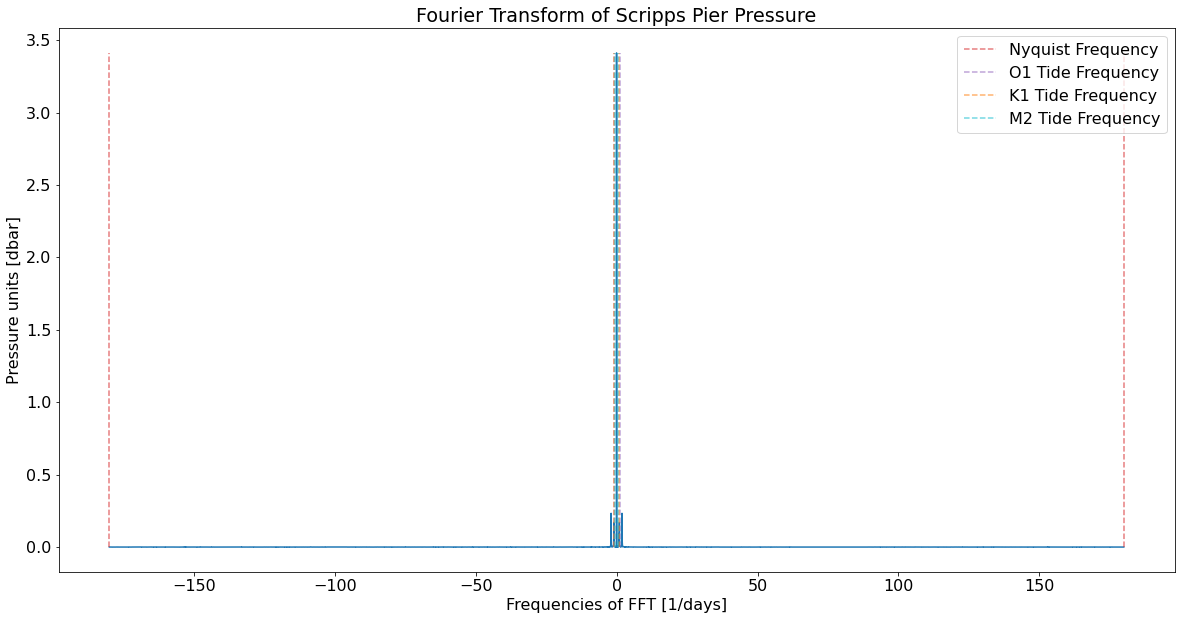

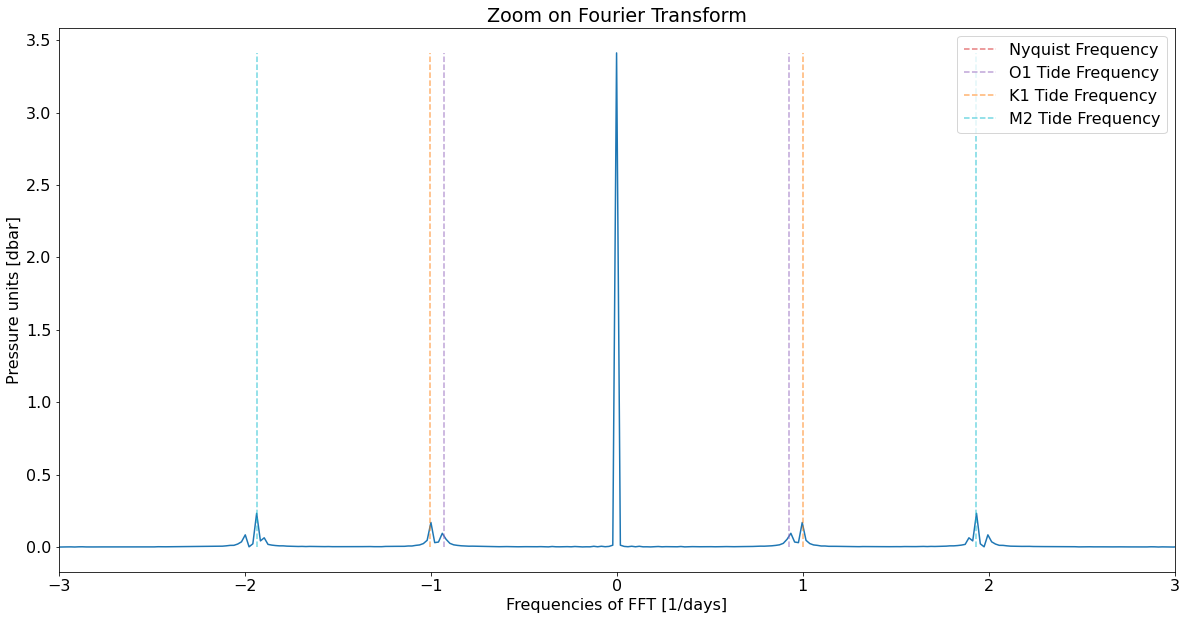

In [536]:
# fourier transform 

# our sampling period is ~ 4min, shown previously in sub_dt (as days)
step = sub_dt # reusing sub_dt 
step = np.nanmean(step)


# then we know Nyquist is 1/2*dt = 1/(2*4/60/24) = ~180 
Nyq = 1/(2*step)

N = len(sub_time)

fftp = scipy.fft.fft(sub_p)
freq = scipy.fft.fftfreq(N,step)
freq = scipy.fft.fftshift(freq)
fftplot = scipy.fft.fftshift(fftp)
ifftp = scipy.fft.ifft(sub_p)


fig,ax = plt.subplots(figsize=(20,10))
# ax.plot(freq, fftplot)
ax.plot(freq, 1.0/N * np.abs(fftplot))
ax.vlines(x=[Nyq,-Nyq],ymin=0,ymax=np.nanmax(1.0/N * np.abs(fftplot)),linestyle='--',color='tab:red',alpha=0.6,label='Nyquist Frequency')
ax.vlines(x=[O1,-O1],ymin=0,ymax=np.nanmax(1.0/N * np.abs(fftplot)),linestyle='--',color='tab:purple',alpha=0.6,label='O1 Tide Frequency')
ax.vlines(x=[K1,-K1],ymin=0,ymax=np.nanmax(1.0/N * np.abs(fftplot)),linestyle='--',color='tab:orange',alpha=0.6,label='K1 Tide Frequency')
ax.vlines(x=[M2,-M2],ymin=0,ymax=np.nanmax(1.0/N * np.abs(fftplot)),linestyle='--',color='tab:cyan',alpha=0.6,label='M2 Tide Frequency')
ax.set(ylabel='Pressure units [dbar]',xlabel='Frequencies of FFT [1/days]',title='Fourier Transform of Scripps Pier Pressure')
ax.legend()
plt.show()

fig,ax = plt.subplots(figsize=(20,10))
# ax.plot(freq, fftplot)
ax.plot(freq, 1.0/N * np.abs(fftplot))
ax.vlines(x=[Nyq,-Nyq],ymin=0,ymax=np.nanmax(1.0/N * np.abs(fftplot)),linestyle='--',color='tab:red',alpha=0.6,label='Nyquist Frequency')

ax.vlines(x=[1/O1,-1/O1],ymin=0,ymax=np.nanmax(1.0/N * np.abs(fftplot)),linestyle='--',color='tab:purple',alpha=0.6,label='O1 Tide Frequency')
ax.vlines(x=[1/K1,-1/K1],ymin=0,ymax=np.nanmax(1.0/N * np.abs(fftplot)),linestyle='--',color='tab:orange',alpha=0.6,label='K1 Tide Frequency')
ax.vlines(x=[1/M2,-1/M2],ymin=0,ymax=np.nanmax(1.0/N * np.abs(fftplot)),linestyle='--',color='tab:cyan',alpha=0.6,label='M2 Tide Frequency')

ax.set(ylabel='Pressure units [dbar]',xlabel='Frequencies of FFT [1/days]',title='Zoom on Fourier Transform')
ax.set_xlim([-3,3])
ax.legend()
plt.show()

There is a spike at zero because I didn't remove the mean! So that peak is expected. 

Otherwise, the peaks in the Fourier transform match with the frequency of each tidal constituent. We have one other peak at a slightly higher frequency for which we don't have a matching tidal constituent, which could be caused by some other basin perturbation. 



### b) Now use the Fourier coefficients to identify the mean pressure and the amplitudes of the major peaks. 

In [537]:

fftp = scipy.fft.fft(sub_p)
freq = scipy.fft.fftfreq(N,step)
freq = scipy.fft.fftshift(freq)
fftplot = scipy.fft.fftshift(fftp)
ifftp = scipy.fft.ifft(sub_p)

norm_fft[peaks]

array([0.23311523, 0.16988187, 0.09508423, 3.4118574 , 0.09508423,
       0.16988187, 0.23311523], dtype=float32)

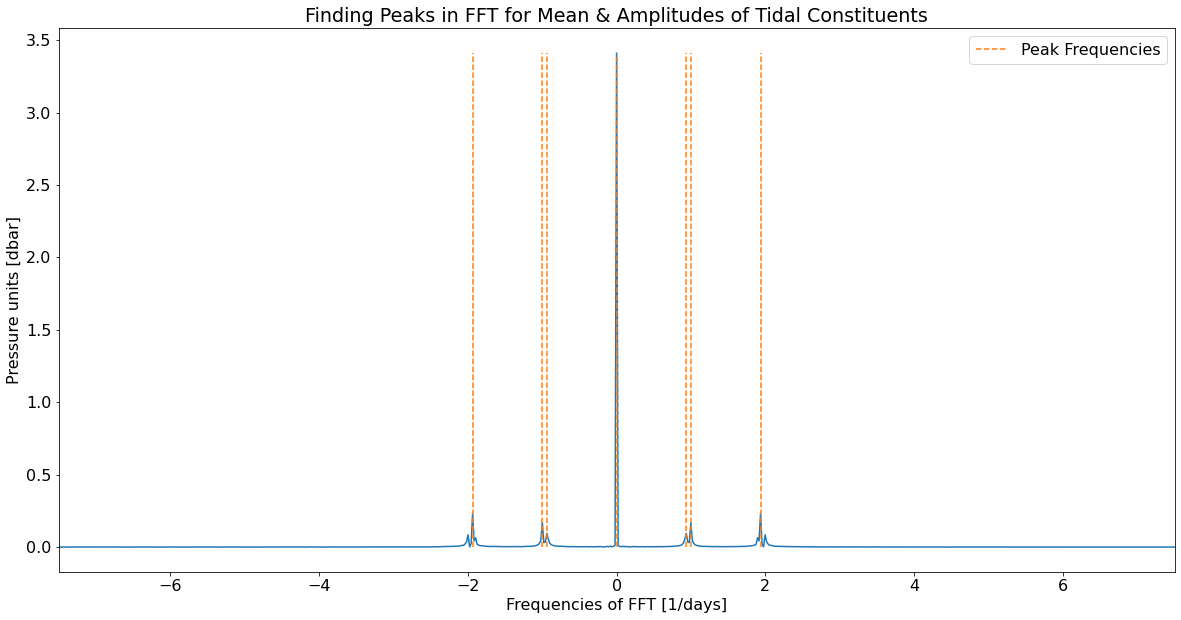

In [538]:
# find means & amplitudes from FFT 
from scipy import signal

norm_fft = 1.0/N * np.abs(fftplot)
peaks, _ = scipy.signal.find_peaks(norm_fft,height=0.09) # threshold=(2,5)) 


fig,ax = plt.subplots(figsize=(20,10))
ax.plot(freq, norm_fft)
# ax.vlines(x=[Nyq,-Nyq],ymin=0,ymax=np.nanmax(1.0/N * np.abs(fftplot)),linestyle='--',color='tab:red',alpha=0.6,label='Nyquist Frequency')
ax.vlines(x=[freq[peaks]],ymin=0,ymax=np.nanmax(1.0/N * np.abs(fftplot)),linestyle='--',color='tab:orange',label='Peak Frequencies')
ax.set(ylabel='Pressure units [dbar]',xlabel='Frequencies of FFT [1/days]',title='Finding Peaks in FFT for Mean & Amplitudes of Tidal Constituents')
ax.legend()
ax.set_xlim([-7.5, 7.5])
plt.show()


Nice - found peaks! And we can see they align with the least squares fit. Now we can find the mean and amplitudes of tidal constituents and compare quantitatively with those from the least-squares fit: 

In [539]:
fft_mean = np.nanmax(norm_fft)
fft_peaks = norm_fft[peaks]

print(f'Mean from FFT is: {fft_mean: 4.4f} dbar')
print('Peak amplitudes from FFT include: ')
for pp in peaks: 
    print(f'{norm_fft[pp]: 4.4f} dbar')



Mean from FFT is:  3.4119 dbar
Peak amplitudes from FFT include: 
 0.2331 dbar
 0.1699 dbar
 0.0951 dbar
 3.4119 dbar
 0.0951 dbar
 0.1699 dbar
 0.2331 dbar


### c) Do these spectral peaks align with the results from the least-squares fit? Is there anything you could do to further check your results?

In [540]:
# know that peaks are ordered from - to + 

M2_peaks = [peaks[0],peaks[6]]
K1_peaks = [peaks[1],peaks[5]]
O1_peaks = [peaks[2],peaks[4]]

M2_fft = np.sqrt(norm_fft[M2_peaks[0]]**2 + norm_fft[M2_peaks[1]]**2)
K1_fft = np.sqrt(norm_fft[K1_peaks[0]]**2 + norm_fft[K1_peaks[1]]**2)
O1_fft = np.sqrt(norm_fft[O1_peaks[0]]**2 + norm_fft[O1_peaks[1]]**2)

print(f'Mean from FFT: {fft_mean} dbar\ncompared with \nMean from Least-Sqaures: {ls_mean} dbar')

print('\n')
print(f'Total amplitudes of tidal constituents from FFT: \nO1 = {O1_fft} dbar;\nK1 = {K1_fft} dbar;\nM2 = {M2_fft} dbar')


print(f'Compare with total amplitudes from least-squares fit: \nO1 = {o1_amp} dbar;\nK1 = {k1_amp} dbar;\nM2 = {m2_amp} dbar')


Mean from FFT: 3.4118573665618896 dbar
compared with 
Mean from Least-Sqaures: 3.4096088387882575 dbar


Total amplitudes of tidal constituents from FFT: 
O1 = 0.134469404270174 dbar;
K1 = 0.24024923802473988 dbar;
M2 = 0.32967471424779016 dbar
Compare with total amplitudes from least-squares fit: 
O1 = 0.23330962985680348 dbar;
K1 = 0.3661783487040946 dbar;
M2 = 0.48337009755967403 dbar


We can see that the means align in magnitude. On the other hand, some of the amplitudes don't match perfectly - all of the FFT amplitudes are smaller than a matching frequency for the least-squares amplitudes. For example, the FFT O1 tide total amplitude is less than the least-squares O1 tide total amplitude. Overall though, they have a similar order of magnitude. 

To further check my results, I could check the standard error of the mean from the data and compare the misfit of each of the fitting methods (FFT and least-squares) to tell which ones might be overfitting or underfitting. 

### d) Now plot the spectral energy (based on the squared magnitude of the Fourier coefficients) as a function of frequency. Is the spectrum red, white, or blue?

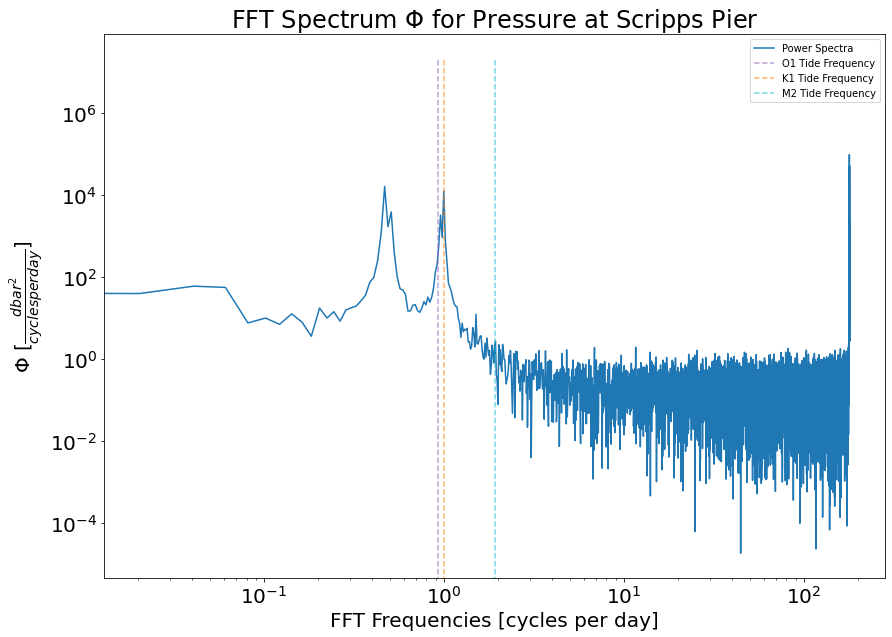

In [541]:
# fftp v norm_fft
even_idx = np.arange(0,N,2)
amp = abs(fftp[even_idx])**2 # even N 

# corresponding frequencies 
period = step*N 
df = 1/period 
fN = Nyq # from before: Nyq = 1/(2*step)
freqs = np.arange(0,fN,df) # frequency vector, in [1/day], goes from 0 to Nyquist



# spectrum: 
amp = amp/(N^2) # correct normalization 
amp = amp*2 # account for discarded redundant complex FFT coefficients 
amp = amp/df 

plt.rcParams.update({'font.size': 20})
# plot 
fig,ax = plt.subplots(figsize=(14,10))
ax.plot(freqs,amp,label='Power Spectra')
ax.vlines(x=[1/O1,-1/O1],ymin=0,ymax=np.nanmax(amp),linestyle='--',color='tab:purple',alpha=0.6,label='O1 Tide Frequency')
ax.vlines(x=[1/K1,-1/K1],ymin=0,ymax=np.nanmax(amp),linestyle='--',color='tab:orange',alpha=0.6,label='K1 Tide Frequency')
ax.vlines(x=[1/M2,-1/M2],ymin=0,ymax=np.nanmax(amp),linestyle='--',color='tab:cyan',alpha=0.6,label='M2 Tide Frequency')

ax.set_xscale('log'); ax.set_yscale('log')
ax.set(xlabel=r'FFT Frequencies [cycles per day]',
       ylabel=r'$\Phi$ [$ \frac{dbar^2}{ cycles per day } $]',
       title=r'FFT Spectrum $\Phi$ for Pressure at Scripps Pier')
ax.legend(fontsize=10)
plt.show()

# versus already normalized ? 



When the spectra has fourier coefficients all around the same amplitude, this is a white spectrum. When the lower frequencies are weighted more than high frequencies, it is a red spectrum. When higher frequencies are weighted more than lower frequencies, it is a blue spectrum. 

Looking at our spectrum, there are higher amplitudes at higher frequencies (aka, the higher frequencies are weighted more than the lower frequencies); this means that we have a blue spectrum! 



Notes from "office hours", end of classes, and numpy documentation/other resources on FFT (for me!): 

different kinds of spectra: 
- spectra where all fourier coefficients are the same amplitude --> white spectrum because all visible frequencies are the same 
- lower frequencies are higher (weighted more) than high frequencies: red spectrum 
- higher frequencies are higher (weighted more) than the lower frequencies: blue spectrum 

The function rfft calculates the FFT of a real sequence and outputs the complex FFT coefficients for only half of the frequency range. The remaining negative frequency components are implied by the Hermitian symmetry of the FFT for a real input (y[n] = conj(y[-n])). In case of N being even: ; in case of N being odd . The terms shown explicitly as are restricted to be purely real since, by the hermitian property, they are their own complex conjugate.